In [36]:
import numpy as np
import pandas as pd
import os
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
path = "data/"
filename = "marketing_campaign.csv"

# Concaténation du chemin et du nom du fichier
file_path = os.path.join(path, filename)

# Lecture du fichier CSV
data_df = pd.read_csv(file_path, sep='\t')

In [32]:
# Taille des données
data_df.shape
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [33]:
data_df.isna().sum(axis=0) # Pas de valeurs manquantes

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [34]:
data_df[data_df['Income'] == np.nan] 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


https://cedric.cnam.fr/vertigo/Cours/ml/tpDonneesManquantes.html

In [35]:
num_df = data_df.select_dtypes(include='number')

# Step 2: Impute the NaN values in numerical columns (using kNN imputation)
imputer = KNNImputer(missing_values=np.nan, n_neighbors=3) # SimpleImputer(strategy='mean')
imputed_num_df = pd.DataFrame(imputer.fit_transform(num_df), columns=num_df.columns)

# Step 3: Combine the imputed numerical columns with the non-numerical columns
non_num_df = data_df.select_dtypes(exclude='number')

# Combine them back together
final_df = pd.concat([imputed_num_df, non_num_df], axis=1)

In [38]:
# Créer une instance de StandardScaler
scaler = RobustScaler()

# Ajuster le scaler et transformer les données
# .fit_transform retourne un tableau NumPy
data_scaled = scaler.fit_transform(data_df)

# Convertir le tableau NumPy résultant en DataFrame avec les mêmes colonnes et index
data_scaled_df = pd.DataFrame(data_scaled, columns=data_df.columns, index=data_df.index)

# Afficher le résultat
print(data_scaled_df)

ValueError: could not convert string to float: 'Graduation'

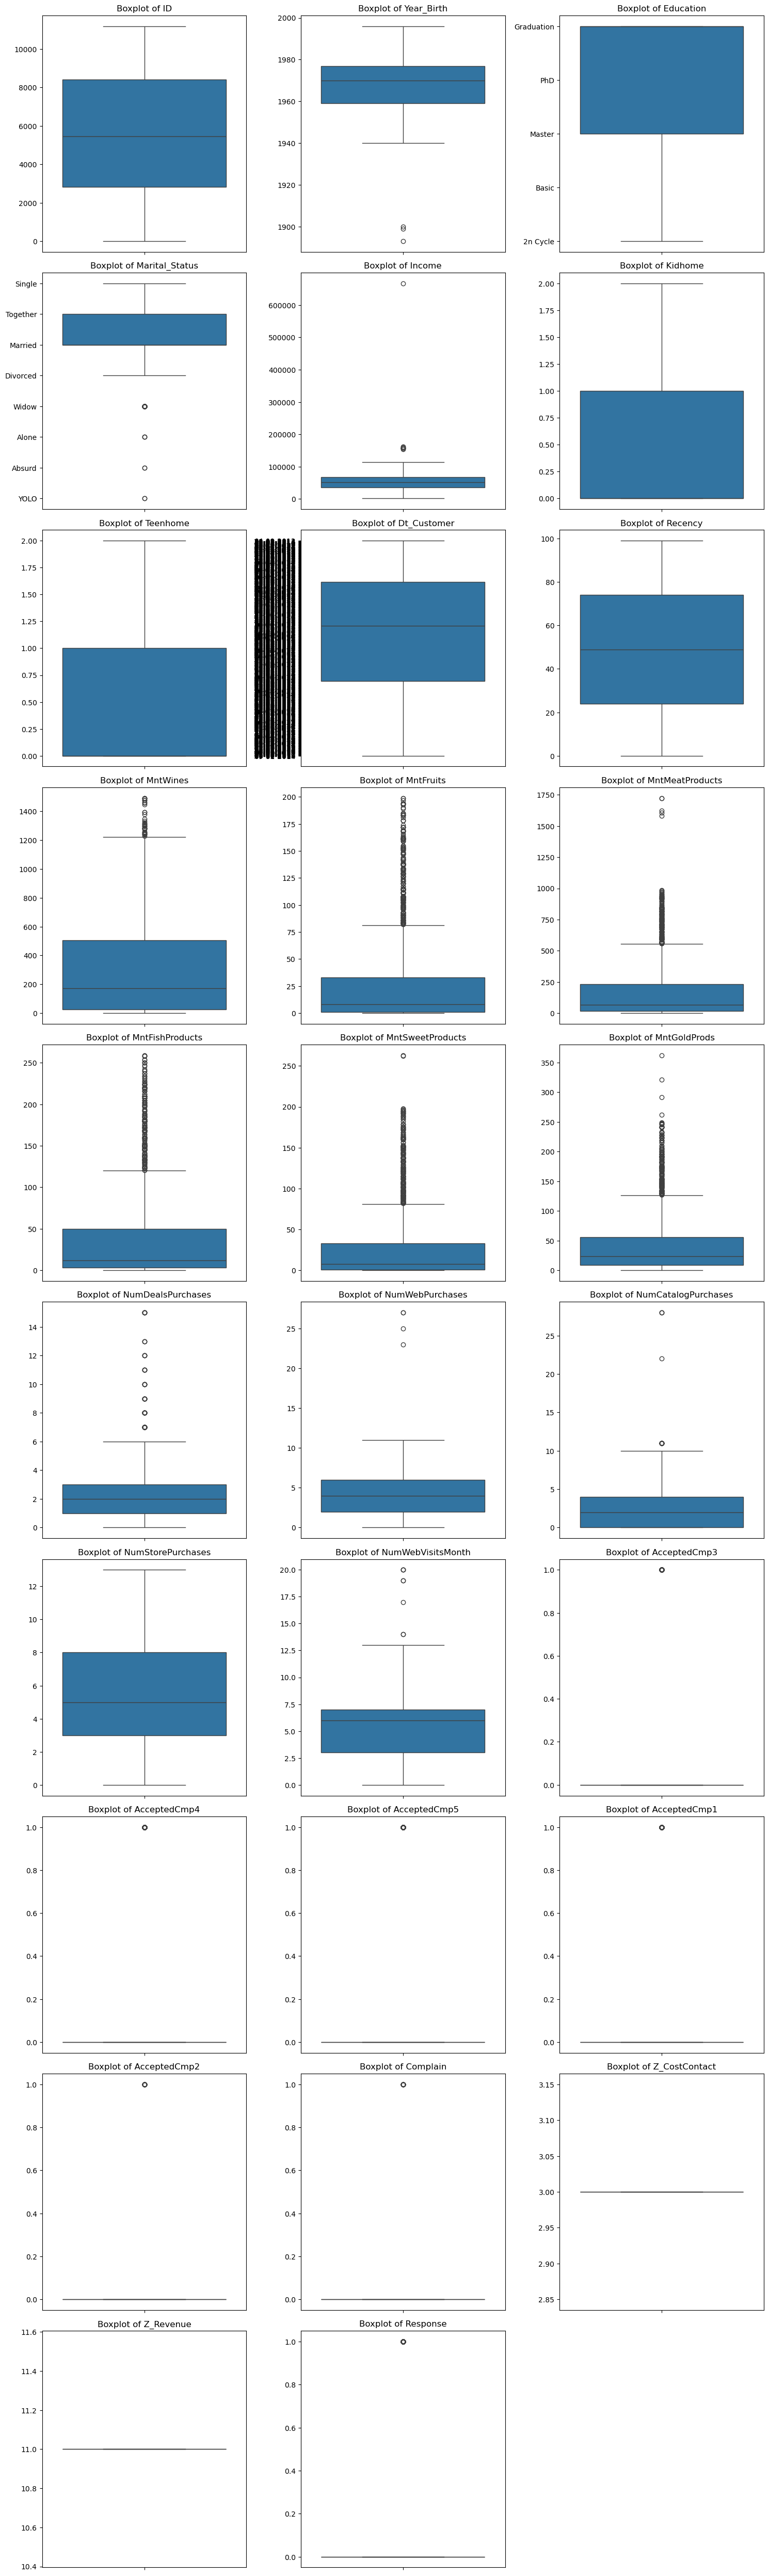

In [28]:
# Evaluation des outliers par boxplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

n_cols = 3  # Adjust the number of columns as needed
n_rows = (len(data_df.columns) // n_cols) + (len(data_df.columns) % n_cols > 0)  # Calculate rows needed

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes array for easy iteration if there are multiple rows
axes = axes.flatten()

# Loop through each column and create a boxplot
for i, col in enumerate(data_df.columns):
    sns.boxplot(ax=axes[i], data=data_df[col])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')  # Optional: hide xlabel for clarity
    axes[i].set_ylabel('')  # Optional: hide ylabel for clarity

# Hide any unused subplots (if the number of columns is not a perfect multiple of n_cols)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()